In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [0]:
m = 0
c = 0
L = 0.0001 #lEARNING RATE
lam = 1.5
epoch = 100
epoch_count_list = []
epoch_error_list = []
l2_error_list = []
weights = []

In [62]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (3).csv


In [0]:
data = pd.read_csv('data.csv', header=0)

In [0]:
Y = data['price_x1000_sh']
X = data['size_in_sq_ft']
N = float(len(X))

In [0]:
def mse(N,Y,Y_hat):
  return (1/N)*sum(Y-Y_hat)**2

In [0]:
def ridge(N,Y,Y_hat,lam,w):
  return ((1/N)*sum(Y-Y_hat)**2) - lam*sum([i**2 for i in w])**2


In [0]:
def gradient_descent_fit(m,c,N, L,lam):
  epoch_error_list=[]
  epoch_count_list=[]
  l2_error_list = []
  weights = []
  for i in range(epoch):
    Y_hat = m*X+c
    epoch_count_list=epoch_count_list[:]
    epoch_count_list.append(i)
    epoch_error = mse(N,Y,Y_hat)
    epoch_error_list.append(epoch_error)
    weights.append(m)
    l2_error = ridge(N,Y,Y_hat,lam,weights)
    l2_error_list.append(l2_error)
    D_m = (-2/N)*sum(X*(Y-Y_hat))
    D_c = (-2/N)*sum(Y-Y_hat)
    m = m-(L*D_m)
    c = c-(L*D_c)
  print("final m is: ", m,"and final c is: ",c)
  return Y_hat,epoch_count_list,epoch_error_list,l2_error_list

final m is:  1.4788027175308887 and final c is:  0.03507497059521459
Weights  [529038.7579078384, 134210.15240608426, 34317.71423446064, 8898.964908939497, 2344.652936160818, 594.1284716912194, 75.40901494567012, -127.25438258587046, -252.7369353467992, -365.35688754603643, -483.39674420787185, -612.5023336409884, -754.6151263171705, -910.4830845139064, -1080.4236259158781, -1264.5809571177476, -1463.0233834996932, -1675.784014260483, -1902.8790843586742, -2144.3165893002847, -2400.100462439501, -2670.232624496012, -2954.713996507866, -3253.545002348822, -3566.7258184920984, -3894.256498264473, -4236.137033688426, -4592.367386267472, -4962.947502312377, -5347.877320571235, -5747.15677602798, -6160.785801793339, -6588.764330046119, -7031.092292501751, -7487.769620645498, -7958.796245848517, -8444.172099425625, -8943.897112664046, -9457.97121683772, -9986.3943432144, -10529.166423059232, -11086.28738763647, -11657.757168210386, -12243.575696045691, -12843.742902407768, -13458.25871856274

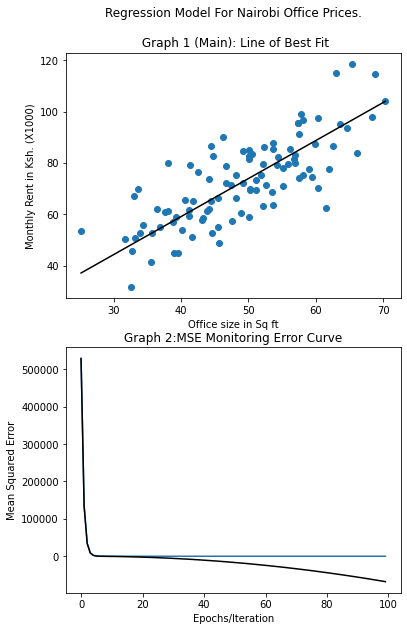

In [98]:
#call gradient descent fit function
returned_params=gradient_descent_fit(m,c,N,L,lam)
y_predicted=returned_params[0]
total_epochs=returned_params[1]
all_epoch_errors=returned_params[2]
all_l2_errors = returned_params[3]


#create plot for both line of best fit and error reduction graphs
fig,(ax1, ax2) = plt.subplots(2,gridspec_kw={'top':2})
ax1.set(xlabel="Office size in Sq ft")
ax1.set(ylabel="Monthly Rent in Ksh. (X1000)")
ax1.set_title("Regression Model For Nairobi Office Prices.\n\n Graph 1 (Main): Line of Best Fit")
ax1.scatter(X,Y)

ax1.plot([min(X),max(X)],[min(y_predicted),max(y_predicted)],color='black')
ax2.set_title("Graph 2:MSE Monitoring Error Curve")
ax2.set(xlabel="Epochs/Iteration")
ax2.set(ylabel="Mean Squared Error")
ax2.plot(total_epochs,all_epoch_errors)
ax2.plot(total_epochs,all_l2_errors, color = 'black')
print("Weights ", all_l2_errors)
print("Epoch errors ", all_epoch_errors)


#Destroy the used lists to prevent recarpetting on append
epoch_count_list.clear()
epoch_error_list.clear()
l2_error_list.clear()